In [3]:
import tensorflow as tf
import numpy as np
from os import listdir
from sklearn.utils import shuffle
from PIL import Image

eval_dir_name = "E-512-A"

def create_tfrecords(data_dir_name,shuf_truth):
  tfrecords_filename = data_dir_name + ".tfrecords"
  def _bytes_feature(value):
      return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

  def _int64_feature(value):
      return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))

  # Create list of image files and list of labeles
  labels = np.array([]).astype('int64')
  data_file_list = []

  for class_id in range(0,6):
      data_dir_complete = data_dir_name + "/" + str(class_id)
      data_file_list_temp = listdir(data_dir_complete)

      for i in range(0,len(data_file_list_temp)):
          data_file_list_temp[i] = data_dir_complete + '/' + data_file_list_temp[i]
      data_file_list = data_file_list + data_file_list_temp
      labels_temp = np.ones(len(data_file_list_temp)).astype('int64')*class_id
      labels = np.append(labels, labels_temp, axis=0)

      if shuf_truth:
        data_file_list, labels = shuffle(data_file_list, labels, random_state=0)

  writer = tf.io.TFRecordWriter(tfrecords_filename)

  for i, img_path in enumerate(data_file_list):
      img = np.array(Image.open(img_path))
      height = img.shape[0]
      width = img.shape[1]
      img_raw = img.tostring()

      example = tf.train.Example(features=tf.train.Features(feature={
          'height': _int64_feature(height),
          'width': _int64_feature(width),
          'image_data': _bytes_feature(img_raw),
          'label': _int64_feature(labels[i])}))
      
      writer.write(example.SerializeToString())
  writer.close()
  return tfrecords_filename

eval_filenames = "./" + create_tfrecords(eval_dir_name,0)

import create_eval_set as eset

eset.eval_filenames = eval_filenames


C:\Users\jirip\AppData\Local\Temp\ipykernel_11816\1031404530.py:40: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  img_raw = img.tostring()


In [58]:

eval_dir_name = "E-512-A"

def _bytes_feature(value):
    return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

def _int64_feature(value):
    return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))

# Create list of image files and list of labeles
labels = np.array([]).astype('int64')
data_file_list = []

for class_id in range(0,6):
    data_dir_complete = eval_dir_name + "/" + str(class_id)
    data_file_list_temp = listdir(data_dir_complete)

    for i in range(0,len(data_file_list_temp)):
        data_file_list_temp[i] = data_dir_complete + '/' + data_file_list_temp[i]
    data_file_list = data_file_list + data_file_list_temp
    labels_temp = np.ones(len(data_file_list_temp)).astype('int64')*class_id
    labels = np.append(labels, labels_temp, axis=0)

for i, img_path in enumerate(data_file_list):
    img = np.array(Image.open(img_path))
    height = img.shape[0]
    width = img.shape[1]
    img_raw = img.tostring()

    example = tf.train.Example(features=tf.train.Features(feature={
        'height': _int64_feature(height),
        'width': _int64_feature(width),
        'image_data': _bytes_feature(img_raw),
        'label': _int64_feature(labels[i])}))

# Create a description of the features.
feature_description = {
    'feature0': tf.io.FixedLenFeature([], tf.int64, default_value=0),
    'feature1': tf.io.FixedLenFeature([], tf.int64, default_value=0),
    'feature2': tf.io.FixedLenFeature([], tf.string, default_value=''),
    'feature3': tf.io.FixedLenFeature([], tf.float32, default_value=0.0),
}

def _parse_function(example_proto):
  # Parse the input `tf.train.Example` proto using the dictionary above.
  return tf.io.parse_single_example(example_proto, feature_description)

filenames = [eval_filenames]
raw_dataset = tf.data.TFRecordDataset(filenames)
raw_dataset

parsed_dataset = raw_dataset.map(_parse_function)
parsed_dataset

# for raw_record in raw_dataset.take(1):
#   example = tf.train.Example()
#   example.ParseFromString(raw_record.numpy())
#   print(example)

# result = {}
# # example.features.feature is the dictionary
# for key, feature in example.features.feature.items():
#   # The values are the Feature objects which contain a `kind` which contains:
#   # one of three fields: bytes_list, float_list, int64_list

#   kind = feature.WhichOneof('kind')
#   result[key] = np.array(getattr(feature, kind).value)

# result



C:\Users\jirip\AppData\Local\Temp\ipykernel_11816\555310689.py:27: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  img_raw = img.tostring()


<MapDataset element_spec={'feature0': TensorSpec(shape=(), dtype=tf.int64, name=None), 'feature1': TensorSpec(shape=(), dtype=tf.int64, name=None), 'feature2': TensorSpec(shape=(), dtype=tf.string, name=None), 'feature3': TensorSpec(shape=(), dtype=tf.float32, name=None)}>

In [53]:
data_file_list[1]
np.shape(data_file_list)


(13248,)

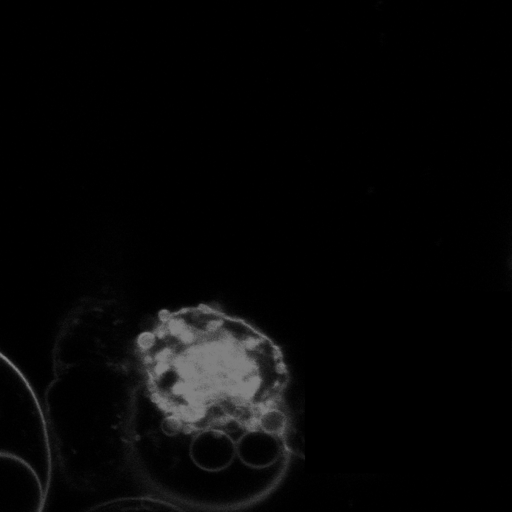

In [57]:
Image.open(data_file_list[0])

In [63]:
data_dir = "E-512-A"
img_height = 512
img_width = 512
batch_size = 3
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  seed=None,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  shuffle=True
  )


Found 13248 files belonging to 6 classes.


In [66]:
val_ds

AttributeError: 'BatchDataset' object has no attribute 'describe'